# Exercise 1 - introducing t-test 

You have already learned about the the command line, scripts, and functions. R has one more level of organisation. Packages. Packages are sets of functions. We have already used one of these. Packages can also include data. We are now going to install a package, load it, and use it just for it's data. 

The package level is what makes R so powerful as a an open source language. you can make a package, get it reviewed, and have it stored on CRAN (Comprehensive R Archive Network) where everyone can download it. This means that R is an active environment for the development of statistical methods and theory.

Description of the package here: https://simplystatistics.org/2018/01/22/the-dslabs-package-provides-datasets-for-teaching-data-science/

In [60]:
install.packages('dplyr')
install.packages('ggplot2')
install.packages('dslabs')

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)



In [61]:
library(dslabs)
library(ggplot2)
library(dplyr)

Let's conduct an analysis of the height data - self-reported heights in inches

In [3]:
data('heights')

This gives us a data frame.

In [4]:
head(heights)

,sex,height
,<fct>,<dbl>
1,Male,75
2,Male,70
3,Male,68
4,Male,74
5,Male,61
6,Female,65


In [5]:
str(heights)

'data.frame':	1050 obs. of  2 variables:
 $ sex   : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 1 1 1 1 2 ...
 $ height: num  75 70 68 74 61 65 66 62 66 67 ...


First let's make frequency distributions for the women and men seperately.

You can make some quick and dirty separate plots using a basic function and indexing...

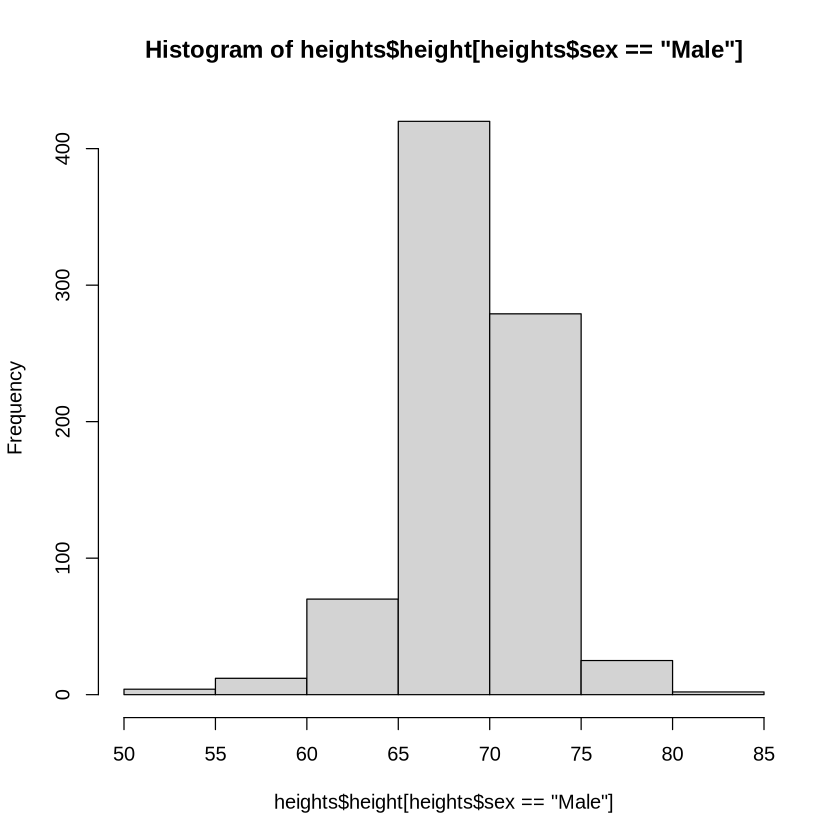

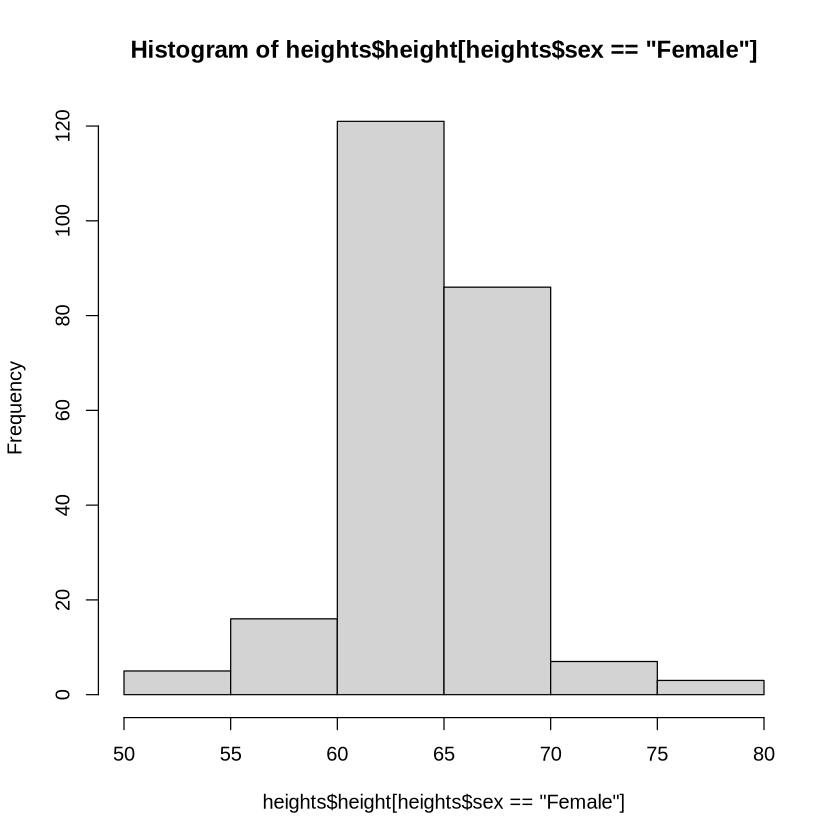

In [7]:
hist(heights$height[heights$sex=="Male"])
hist(heights$height[heights$sex=="Female"])

... though it would be better if we could see all the data together on the same histogram

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


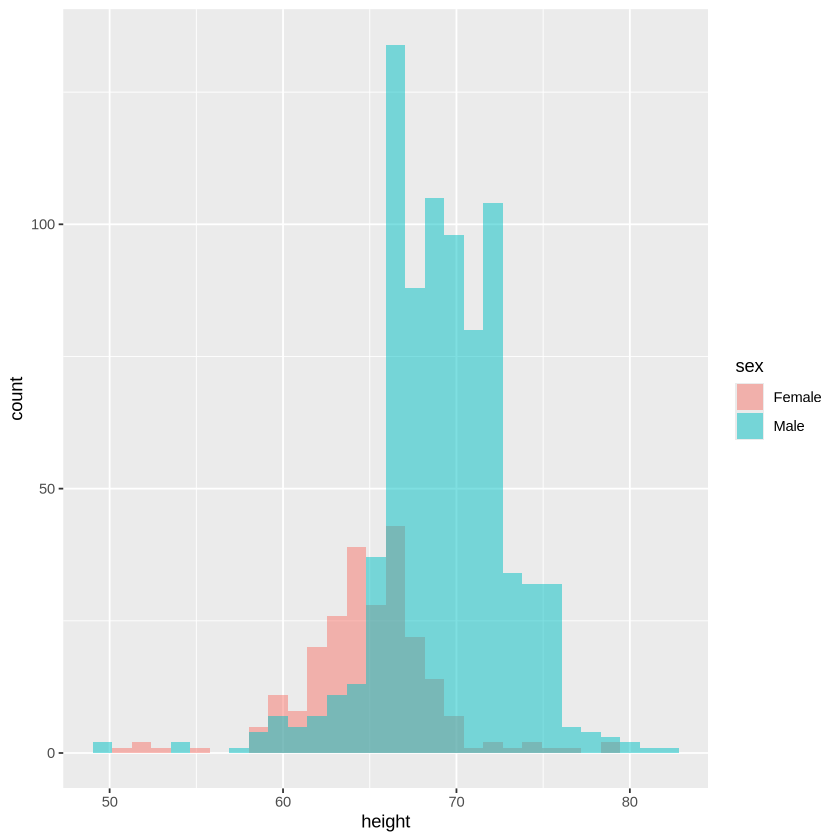

In [10]:
ggplot(heights,
       aes(x=height,
           fill=sex)) +
       geom_histogram(position='identity',
                     alpha=0.5)

Let's look at the summary statistics - you can actually make them in 1 table!

In [11]:
stats_table <- heights %>%
group_by(sex) %>%
summarise(mean_height=mean(height),
          median_height=median(height),
          sd_height=sd(height))

In [12]:
stats_table

sex,mean_height,median_height,sd_height
<fct>,<dbl>,<dbl>,<dbl>
Female,64.93942,64.98031,3.760656
Male,69.31475,69.00000,3.611024


In [13]:
shapiro.test(heights$height[heights$sex=="Male"])


	Shapiro-Wilk normality test

data:  heights$height[heights$sex == "Male"]
W = 0.96374, p-value = 2.623e-13


In [15]:
shapiro.test(heights$height[heights$sex=="Female"])


	Shapiro-Wilk normality test

data:  heights$height[heights$sex == "Female"]
W = 0.94255, p-value = 4.671e-08


Tests how close the data distribution is to the optimal normal distribution.
W-value should be as close to 1 as possible and p-value as small as possible

Lets try visualising the data in terms of probability distributions

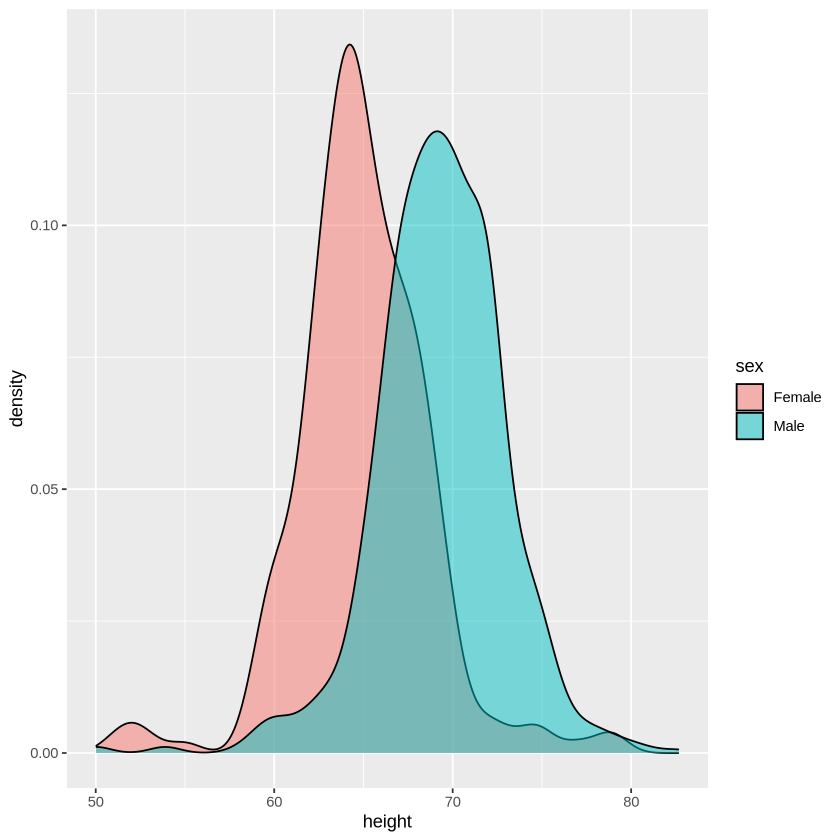

In [16]:
ggplot(heights,
       aes(x=height,
           fill=sex)) +
geom_density(alpha=0.5)

Males are most likely to have a height around 70 and women are most likely to have a height around 65

Now we are ready to run a hypothesis test. Are men taller than women? What sort of t test should we do?

In [17]:
t.test(height~sex, data=heights) 


	Welch Two Sample t-test

data:  height by sex
t = -15.925, df = 374.41, p-value < 2.2e-16
alternative hypothesis: true difference in means between group Female and group Male is not equal to 0
95 percent confidence interval:
 -4.915553 -3.835108
sample estimates:
mean in group Female   mean in group Male 
            64.93942             69.31475 


To write tilde: Press alt + ^

Null hypothesis was rejected because p-value is under 0.05 
E-minus16 tells us to move the decimal 16 places (0's) back 
Df tells us the degree of freedem (The bigger the better)
T: T distribution tells us how likely the distribution is to represent the population

# Exercise 2 - Some more messy real world data

We have been dealing with data that is fairly well organised. Let's look at some data that is slightly more messy

Install and load the fuelconomy package, which has fuel economy data from the EPA: https://cran.r-project.org/web/packages/fueleconomy/fueleconomy.pdf

In [18]:
install.packages('fueleconomy')

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)



In [19]:
library(fueleconomy)

In [22]:
data(vehicles)

In [23]:
str(vehicles)

tibble [33,442 × 12] (S3: tbl_df/tbl/data.frame)
 $ id   : num [1:33442] 13309 13310 13311 14038 14039 ...
 $ make : chr [1:33442] "Acura" "Acura" "Acura" "Acura" ...
 $ model: chr [1:33442] "2.2CL/3.0CL" "2.2CL/3.0CL" "2.2CL/3.0CL" "2.3CL/3.0CL" ...
 $ year : num [1:33442] 1997 1997 1997 1998 1998 ...
 $ class: chr [1:33442] "Subcompact Cars" "Subcompact Cars" "Subcompact Cars" "Subcompact Cars" ...
 $ trans: chr [1:33442] "Automatic 4-spd" "Manual 5-spd" "Automatic 4-spd" "Automatic 4-spd" ...
 $ drive: chr [1:33442] "Front-Wheel Drive" "Front-Wheel Drive" "Front-Wheel Drive" "Front-Wheel Drive" ...
 $ cyl  : num [1:33442] 4 4 6 4 4 6 4 4 6 5 ...
 $ displ: num [1:33442] 2.2 2.2 3 2.3 2.3 3 2.3 2.3 3 2.5 ...
 $ fuel : chr [1:33442] "Regular" "Regular" "Regular" "Regular" ...
 $ hwy  : num [1:33442] 26 28 26 27 29 26 27 29 26 23 ...
 $ cty  : num [1:33442] 20 22 18 19 21 17 20 21 17 18 ...


In [21]:
head(vehicles)

id,make,model,year,class,trans,drive,cyl,displ,fuel,hwy,cty
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
13309,Acura,2.2CL/3.0CL,1997,Subcompact Cars,Automatic 4-spd,Front-Wheel Drive,4,2.2,Regular,26,20
13310,Acura,2.2CL/3.0CL,1997,Subcompact Cars,Manual 5-spd,Front-Wheel Drive,4,2.2,Regular,28,22
13311,Acura,2.2CL/3.0CL,1997,Subcompact Cars,Automatic 4-spd,Front-Wheel Drive,6,3.0,Regular,26,18
14038,Acura,2.3CL/3.0CL,1998,Subcompact Cars,Automatic 4-spd,Front-Wheel Drive,4,2.3,Regular,27,19
14039,Acura,2.3CL/3.0CL,1998,Subcompact Cars,Manual 5-spd,Front-Wheel Drive,4,2.3,Regular,29,21
14040,Acura,2.3CL/3.0CL,1998,Subcompact Cars,Automatic 4-spd,Front-Wheel Drive,6,3.0,Regular,26,17


Let's set ourselves the task of comparing the city fuel economy of the midsize class of two car brands: Audi and VW

Our first step is to isolate the relevant data. There are many ways to do this. Here's one:

In [24]:
Audi_Midsize <- vehicles %>%
filter(make == "Audi" & class == "Midsize Cars")

In [25]:
VW_Midsize <- vehicles %>%
filter(make == "Volkswagen" & class == "Midsize Cars")

How many cars do we have in each group?

In [26]:
nrow(Audi_Midsize)

[1] 157

In [27]:
dim(Audi_Midsize)

[1] 157  12

In [28]:
dim(VW_Midsize)

[1] 97 12

Let's use t.test to compare performance of the two cars

In [29]:
t.test(Audi_Midsize$cty, VW_Midsize$cty)


	Welch Two Sample t-test

data:  Audi_Midsize$cty and VW_Midsize$cty
t = -7.1511, df = 125.12, p-value = 6.348e-11
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.232765 -2.397743
sample estimates:
mean of x mean of y 
 16.29299  19.60825 


The null hypothesis is rejected because the p-value is under .05 

Let's visualise the data and see if this is the best way to ask our question

In [30]:
Audi_VW <- rbind(Audi_Midsize, VW_Midsize)

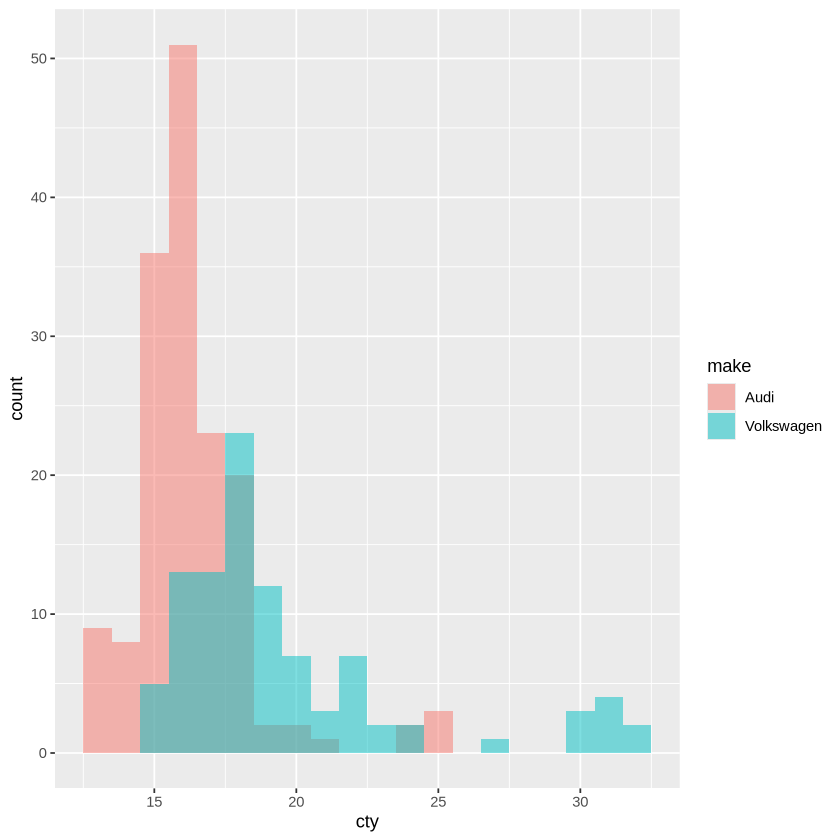

In [32]:
ggplot(Audi_VW,
       aes(x = cty,
           fill = make)) +
geom_histogram(position = 'identity',
               alpha=0.5,
              bins=20)

In [33]:
shapiro.test(Audi_Midsize$cty)
shapiro.test(VW_Midsize$cty)


	Shapiro-Wilk normality test

data:  Audi_Midsize$cty
W = 0.80939, p-value = 4.961e-13



	Shapiro-Wilk normality test

data:  VW_Midsize$cty
W = 0.77643, p-value = 7.732e-11


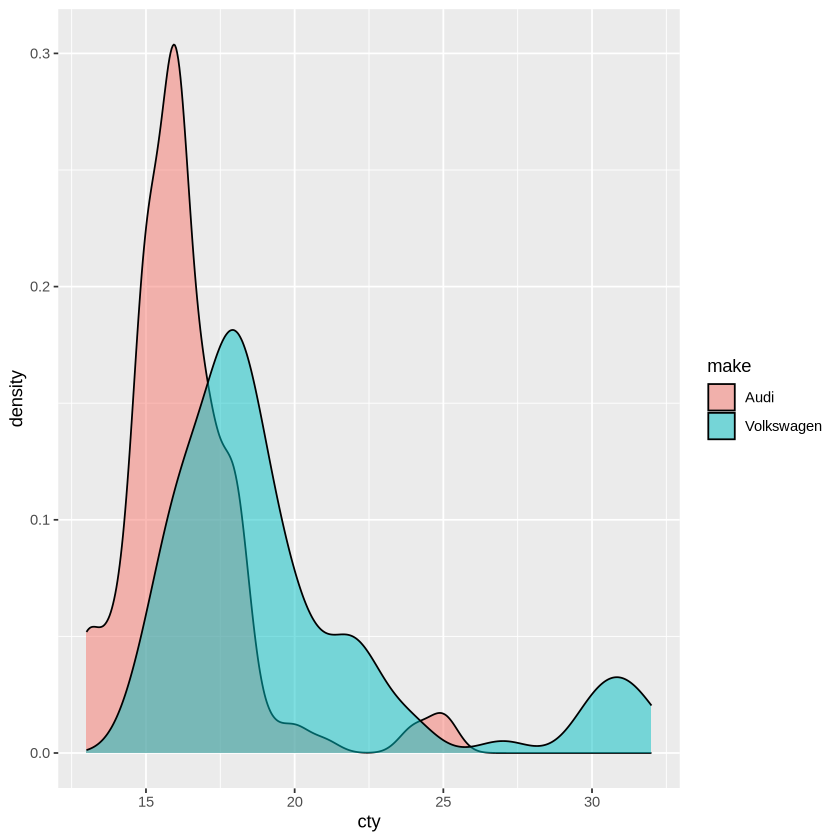

In [34]:
ggplot(Audi_VW,
       aes(x=cty,
           fill=make)) +
geom_density(alpha=0.5)

We see that a normal distribution is an okay model for our data, but perhaps not the best one. We can see something important happening in the tails suggesting there is important structure we will miss.

Let's investigate that structure

In [35]:
str(Audi_VW)

tibble [254 × 12] (S3: tbl_df/tbl/data.frame)
 $ id   : num [1:254] 5656 5657 6784 6785 7908 ...
 $ make : chr [1:254] "Audi" "Audi" "Audi" "Audi" ...
 $ model: chr [1:254] "100" "100" "100" "100" ...
 $ year : num [1:254] 1989 1989 1990 1990 1991 ...
 $ class: chr [1:254] "Midsize Cars" "Midsize Cars" "Midsize Cars" "Midsize Cars" ...
 $ trans: chr [1:254] "Automatic 3-spd" "Manual 5-spd" "Automatic 3-spd" "Automatic 4-spd" ...
 $ drive: chr [1:254] "Front-Wheel Drive" "Front-Wheel Drive" "Front-Wheel Drive" "Front-Wheel Drive" ...
 $ cyl  : num [1:254] 5 5 5 5 5 6 6 6 6 6 ...
 $ displ: num [1:254] 2.3 2.3 2.3 2.3 2.3 2.8 2.8 2.8 2.8 2.8 ...
 $ fuel : chr [1:254] "Regular" "Regular" "Regular" "Regular" ...
 $ hwy  : num [1:254] 20 23 20 22 22 23 22 24 22 24 ...
 $ cty  : num [1:254] 17 16 16 16 16 15 17 17 17 17 ...


Let's make a scatterplot

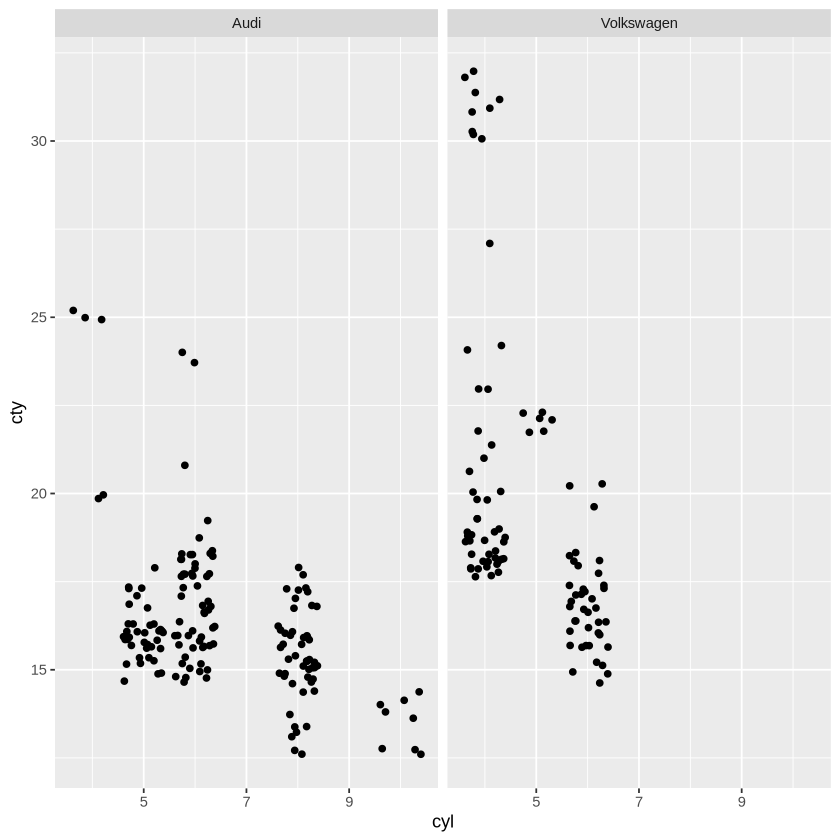

In [38]:
ggplot(Audi_VW,
       aes(x = cyl,
           y = cty)) +
geom_point(position = 'jitter') + 
facet_wrap(~make)

The scatterplot shows that the cars with less cylinders in general have higher fuel efficiency and that Volkswagen cars tend to have less cylinders than Audi cars

Extra task

In [57]:
data(iris)

1. Look up documentation - what is each variable?
2. Look at the dataframe
3. Plot all sepal width to petal width ratio for all 3 species in 1 plot - make it fancy
4. Compare setosa and versicolor varieties in terms of sepal length
   - summary stats
   - making frequency plots
   - making probability plots
   - normality test
   - t-test + interpretation

In [40]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [41]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [42]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

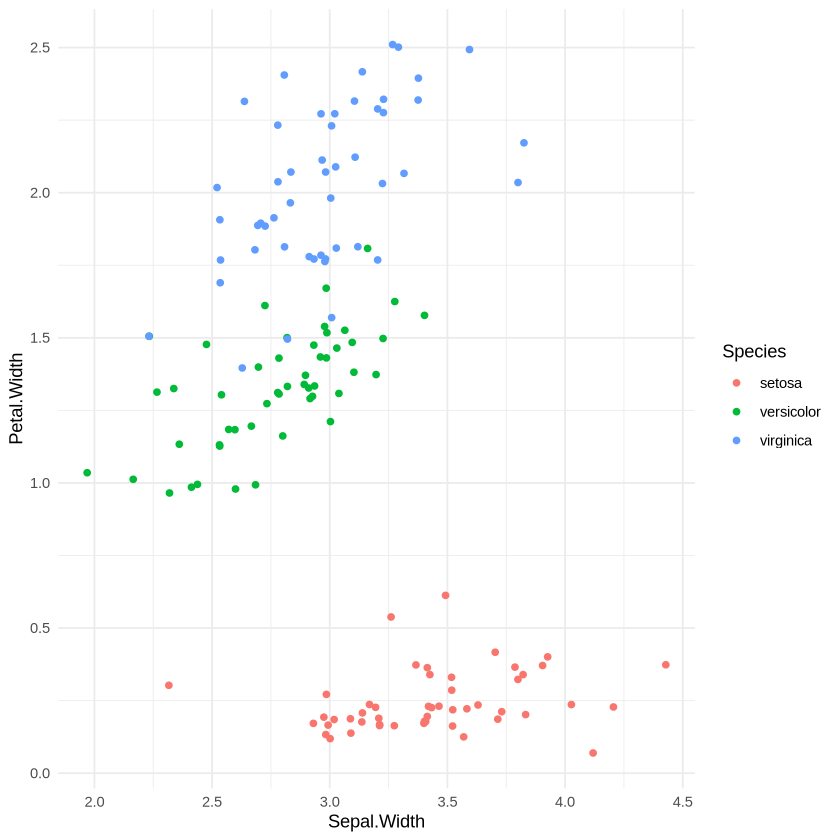

In [64]:
ggplot(iris,
       aes(x= Sepal.Width,
           y= Petal.Width, 
           color= Species)) +
       geom_point(position = 'jitter') +
theme_minimal()

In [78]:
setosa_varieties <- iris %>%
filter(Species == "setosa")

versicolor_varieties <- iris %>%
filter(Species == "versicolor")

To simply remove virginica use filter(Species != 'virginica')

In [75]:
summary(setosa_varieties)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.300   Min.   :1.000   Min.   :0.100  
 1st Qu.:4.800   1st Qu.:3.200   1st Qu.:1.400   1st Qu.:0.200  
 Median :5.000   Median :3.400   Median :1.500   Median :0.200  
 Mean   :5.006   Mean   :3.428   Mean   :1.462   Mean   :0.246  
 3rd Qu.:5.200   3rd Qu.:3.675   3rd Qu.:1.575   3rd Qu.:0.300  
 Max.   :5.800   Max.   :4.400   Max.   :1.900   Max.   :0.600  
       Species  
 setosa    :50  
 versicolor: 0  
 virginica : 0  
                
                
                

In [73]:
summary(versicolor_varieties)

  Sepal.Length    Sepal.Width     Petal.Length   Petal.Width          Species  
 Min.   :4.900   Min.   :2.000   Min.   :3.00   Min.   :1.000   setosa    : 0  
 1st Qu.:5.600   1st Qu.:2.525   1st Qu.:4.00   1st Qu.:1.200   versicolor:50  
 Median :5.900   Median :2.800   Median :4.35   Median :1.300   virginica : 0  
 Mean   :5.936   Mean   :2.770   Mean   :4.26   Mean   :1.326                  
 3rd Qu.:6.300   3rd Qu.:3.000   3rd Qu.:4.60   3rd Qu.:1.500                  
 Max.   :7.000   Max.   :3.400   Max.   :5.10   Max.   :1.800                  

In [79]:
sepal_comparison <- rbind(setosa_varieties, versicolor_varieties)

In [84]:
iris2 <- iris %>%
filter(Species != 'virginica')

In [85]:
stats_table <- iris2 %>%
group_by(Species) %>%
summarise(mean_lenght=mean(Sepal.Length),
          median_length=median(Sepal.Length),
          sd_length=sd(Sepal.Length))
stats_table

Species,mean_lenght,median_length,sd_length
<fct>,<dbl>,<dbl>,<dbl>
setosa,5.006,5.0,0.3524897
versicolor,5.936,5.9,0.5161711


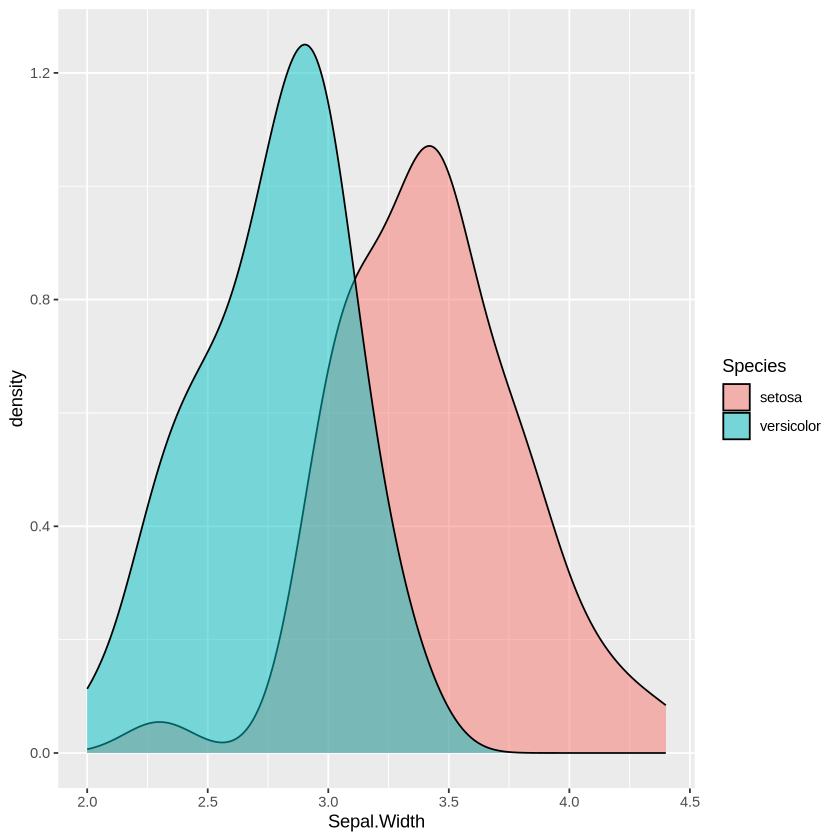

In [87]:
ggplot(iris2,
       aes(x=Sepal.Width,
           fill=Species)) +
geom_density(alpha=0.5)

In [89]:
shapiro.test(iris2$Sepal.Length[iris2$Species == 'setosa'])
shapiro.test(iris2$Sepal.Length[iris2$Species == 'versicolor'])


	Shapiro-Wilk normality test

data:  iris2$Sepal.Length[iris2$Species == "setosa"]
W = 0.9777, p-value = 0.4595



	Shapiro-Wilk normality test

data:  iris2$Sepal.Length[iris2$Species == "versicolor"]
W = 0.97784, p-value = 0.4647


In [ ]:
t.test(Sepal.Legn